In [2]:
import os
import pickle
import numpy as np
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
# import neurokit2 as nk
import pandas as pd
import random
# %matplotlib inline 
import pyhrv

In [3]:
# Class to read the data from the dataset
class read_data_of_one_subject:
    """Read data from WESAD dataset"""
    def __init__(self, path, subject):
        self.keys = ['label', 'subject', 'signal']
        self.signal_keys = ['wrist', 'chest']
        self.chest_sensor_keys = ['ACC', 'ECG', 'EDA', 'EMG', 'Resp', 'Temp']
        self.wrist_sensor_keys = ['ACC', 'BVP', 'EDA', 'TEMP']
        #os.chdir(path)
        #os.chdir(subject)
        with open(path + subject +'/'+subject + '.pkl', 'rb') as file:
            data = pickle.load(file, encoding='latin1')
        self.data = data

    def get_labels(self):
        return self.data[self.keys[0]]

    def get_wrist_data(self):
        """"""
        #label = self.data[self.keys[0]]
        assert subject == self.data[self.keys[1]]
        signal = self.data[self.keys[2]]
        wrist_data = signal[self.signal_keys[0]]
        #wrist_ACC = wrist_data[self.wrist_sensor_keys[0]]
        #wrist_ECG = wrist_data[self.wrist_sensor_keys[1]]
        return wrist_data

    def get_chest_data(self):
        """"""
        signal = self.data[self.keys[2]]
        chest_data = signal[self.signal_keys[1]]
        return chest_data


In [4]:
# function that get the data from a certain subject
def get_data(subject):
    # Object instantiation
    obj_data = {}
    data_set_path = "C:/Users/riche/Downloads/WESAD/WESAD/"
    # Accessing class attributes and method through objects
    obj_data[subject] = read_data_of_one_subject(data_set_path, subject)

    return obj_data[subject]

In [5]:
# function that get and print the length of the chest data 
def print_length_signal(signal):
    chest_data_dict = signal.get_chest_data()
    chest_dict_length = {key: len(value) for key, value in chest_data_dict.items()}
    print(chest_dict_length)

In [6]:
# Function that gets and plots the labels
# 0 = not defined / transient, 1 = baseline, 2 = stress, 3 = amusement, 4 = meditation, 5/6/7 = should be ignored in this dataset.
def plot_labels(signal):
    fs = 700
    labels = signal.get_labels()
    t=np.arange(0,labels.size*(1/fs),(1/fs))
    t=t[:labels.size]
    plt.plot(t, labels)
    plt.title('Labels vs time')
    plt.ylabel('label')
    plt.xlabel('time(ms)')
    plt.plot(labels)
    return labels

In [29]:
# Function that get a samples of 10 times the fs of an ecg signal
def get_samples_signal(signal, labels, label, fs):
    chest_data_dict = signal.get_chest_data()

    baseline = np.asarray([idx for idx,val in enumerate(labels) if val == label])

    ecg_base=chest_data_dict['ECG'][baseline,0]

    indexes = np.arange(0,len(baseline)-7000,1)

    index = random.choice(indexes)

    # cut a smaller window
    ecg=ecg_base[index:index+ 10*fs]
    t=np.arange(0,ecg.size*(1/fs),(1/fs))
    t=t[:ecg.size]

    plt.figure(figsize=(12,4))
    plt.plot(t,ecg)
    plt.xlabel('$Time (s)$') 
    plt.ylabel('$ECG$')  
    return ecg

In [8]:
# Function that writes a dataframe to an csv file
def write_to_csv(df, file):
    df.to_csv(index=False)
    location = "C:/Users/riche/Desktop/ECG/"
    path = location + file
    os.makedirs(location, exist_ok=True)  
    df.to_csv(path)

In [27]:
# Function that get samples from all subject and writes it to a csv file
def get_samples(label):
    fs = 700
    df = pd.DataFrame() # create empty data frame

    for i in range(2,18): # loop over amount of subject
        for a in range(0,3): # three samples per subject
            subject = 'S' + str(i)
            title = subject + str(a)
            print(subject)
            if subject != "S12": #S12 doenst exist
                signal = get_data(subject) 
                labels = signal.get_labels()
                ecg = get_samples_signal(signal, labels, label, fs)
                print(len(ecg))
                df[title] = ecg
                
    file = "out_" + str(label) + ".csv"
    write_to_csv(df, file)
    

Text(0, 0.5, '$ECG$')

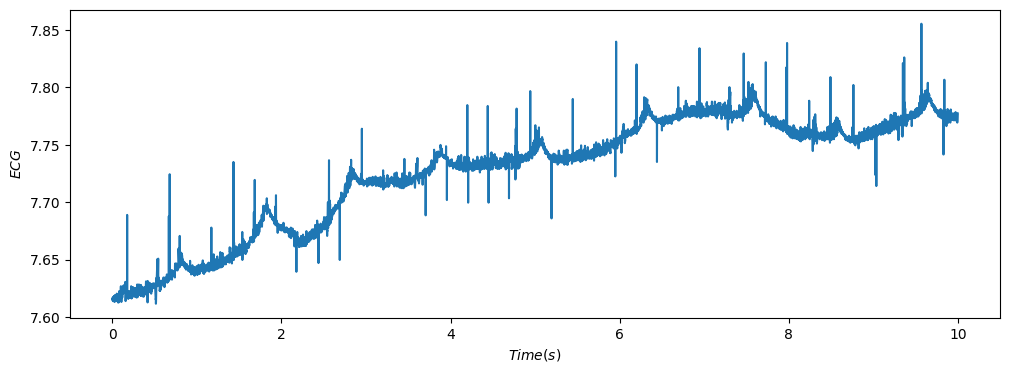

In [61]:
subject = "S3"
fs=700
label = 1
signal = get_data(subject) 
labels = signal.get_labels()
chest_data_dict = signal.get_chest_data()

baseline = np.asarray([idx for idx,val in enumerate(labels) if val == label])

eda_base=chest_data_dict['EDA'][baseline,0]

# indexes = np.arange(0,len(baseline)-7000,1)

# index = random.choice(indexes)

# cut a smaller window
eda=eda_base[10000:10000+ 10*fs]
t=np.arange(0,eda.size*(1/fs),(1/fs))
t=t[:eda.size]

plt.figure(figsize=(12,4))
plt.plot(t,eda)
plt.xlabel('$Time (s)$') 
plt.ylabel('$ECG$')  


Text(0, 0.5, '$ECG$')

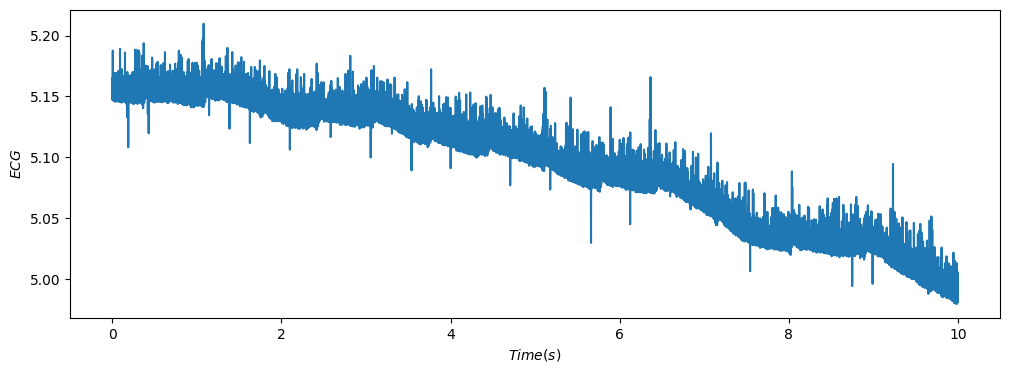

In [47]:
eda=eda_base[10000:10000+ 10*fs]
t=np.arange(0,eda.size*(1/fs),(1/fs))
t=t[:eda.size]

plt.figure(figsize=(12,4))
plt.plot(t,eda)
plt.xlabel('$Time (s)$') 
plt.ylabel('$ECG$') 

In [11]:
label = 4 #1 = baseline, 2 = stress, 3 = amusement, 4 = meditation
# get_samples(label) # run to get csv file of all the sample signals

# **Respiration**

In [12]:
# rpeaks, info = nk.ecg_peaks(ecg, sampling_rate=fs)
# ecg_rate = nk.ecg_rate(r_peaks_pan, sampling_rate=fs, desired_length=len(ecg))

In [13]:
# edr = nk.ecg_rsp(ecg_rate, sampling_rate=fs)
# # Visual comparison
# nk.signal_plot(edr)

In [14]:
# rpeaks, info = nk.ecg_peaks(ecg, sampling_rate=fs)
# ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=fs, desired_length=len(ecg))
# edr = nk.ecg_rsp(ecg_rate, sampling_rate=fs)
# # Visual comparison
# nk.signal_plot(edr)

In [15]:
# resp=chest_data_dict['Resp'][baseline,0]
# resp=resp[10000:10000+ 10*fs]
# t=np.arange(0,resp.size*(1/fs),(1/fs))
# t=t[:ecg.size]

# plt.figure(figsize=(12,4))
# plt.plot(t,resp)
# plt.xlabel('$Time (s)$') 
# plt.ylabel('$ECG$') 